# Week 4 - Introduction to Text Data

This notebook provides an introduction to the basic tools for text analytics.

## Set up and load data

In [2]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

C:\Users\gehwo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn

We use as an example the **20 Newsgroups** ([[http://qwone.com/~jason/20Newsgroups/]]) dataset (from `sklearn`), a collection of about 20,000 newsgroup (message forum) documents. 

In [4]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups() # object is a dictionary
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Data Set Characteristics:

In [5]:
print(data['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [6]:
W, y = data.data, data.target
n_samples = y.shape[0]
n_samples

11314

In [7]:
y[:10] # news story categories

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [8]:
doc = W[0]
doc

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

## Make a pandas dataframe

In [9]:
df = pd.DataFrame(W,columns=['text'])
df['topic'] = y
df.head()

,text,topic
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


# Working with Text Data

In [10]:
import nltk
nltk.download('stopwords') 
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gehwo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gehwo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Iterate over some documents:

In [11]:
from gensim.utils import simple_preprocess

processed = []
# iterate over rows
for i, text in enumerate(W):
    document = simple_preprocess(text) # get sentences/tokens
    processed.append(document) # add to list
    if i > 100:
        break

In [12]:
processed[0][:10]

['from',
 'lerxst',
 'wam',
 'umd',
 'edu',
 'where',
 'my',
 'thing',
 'subject',
 'what']

## Removing unicode characters

In [13]:
#!pip install unidecode
from unidecode import unidecode # package for removing unicode
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

['Visualizations\xa0'] ['Visualizations ']


## Translation

In [14]:
#!pip install googletrans
from googletrans import Translator
translator = Translator()
lang = translator.detect('이 문장은 한글로 쓰여졌습니다.').lang
lang

'ko'

In [15]:
eng = translator.translate('Seit 1898 war Brazzaville die Hauptstadt von Französisch-Äquatorialafrika. Die Einwohnerzahl stieg von etwa 5000 Einwohnern um die Jahrhundertwende auf etwa 100.000 im Jahre 1950. 1940 schloss sich Französisch-Kongo dem sog. Freien Frankreich, also dem von den Deutschen im Zweiten Weltkrieg nicht besetzen Teils Frankreichs, an. Brazzaville war vom 26. Oktober 1940 an kurze Zeit die Hauptstadt des "Freien Frankreich", bevor der Sitz schließlich nach Algier, Algerien, verlegt wurde. Der im Londoner Exil befindliche Führer von "France Libre", General Charles de Gaulle, hatte hier einen festen Regierungssitz, die heutige Residenz des französischen Botschafters ("Case de Gaulle"). Im Januar 1944 fand hier unter Leitung Generals de Gaulle die Konferenz von Brazzaville über die zukünftige Ordnung im französischen Kolonialreich statt. Das älteste, noch existierende Bauwerk der Stadt ist die im Backsteinstil um 1900 errichtete Kathedrale, die sich aus der dort befindlichen katholischen Missionsstation entwickelt hatte (heute Sitz des Erzbischofs von Brazzaville). Frankreich hat in der Stadt zahlreiche weitere architektonisch bemerkenswerte Gebäude und Bauwerke sowohl der traditionellen sog. Kolonialarchitektur als auch der von der Bauhaus-Tradition und von Le Corbusier beeinflussten klassischen Moderne hinterlassen (u. a. Architekt Roger Errell, Kirche Sainte Anne, "Case de Gaulle", sog. Air-France-Gebäude, Cinéma Vogue, Sitz des Schatzamtes, Gebäude der heutigen russischen Botschaft, mehrere Verwaltungsbauten). Der Begründer dieser ehemaligen französischen Kolonie, de Brazza, wird auch heute von den Kongolesen nicht als Kolonisator im sonst üblichen negativen Sinn verstanden, sondern als Begründer des kongolesischen Staates verehrt. Seine sterblichen Überreste befinden sich einem großen Kuppel-Bauwerk, das gleichzeitig Museum ist ("Mémorial de Brazza").',
                           src='de',
                           dest='en')
eng.text

'Since 1898 Brazzaville was the capital of French Equatorial Africa. The population increased from about 5,000 inhabitants at the turn of the century to around 100,000 in 1950. 1940 joined the so-called French Congo. Free France, that is the non-occupied by the Germans during World War II part of France, to. Brazzaville was on 26 October 1940, a short time the capital of the "Free French" before the seat was finally moved to Algiers, Algeria. The leader of "Free France" located in exile in London, General Charles de Gaulle, here had a firm seat of government, the current residence of the French ambassador ( "Case de Gaulle"). In January 1944, the Conference of Brazzaville on the future order in the French colonial empire was held here under the direction of General de Gaulle. The oldest surviving building in the city is built in brick style around 1900 Cathedral, which had developed from the present there Catholic Mission (now the seat of the Archbishop of Brazzaville). France has in t

# Quantity of Text

Count words per document.

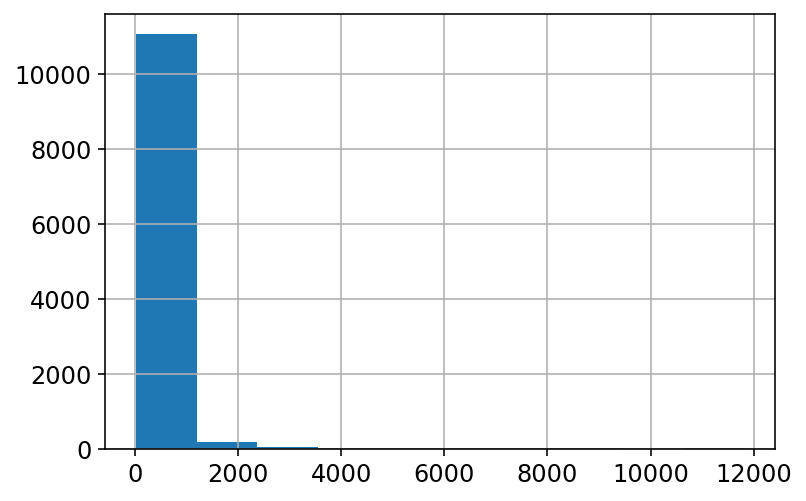

In [16]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our data
df['num_words'] = df['text'].apply(get_words_per_doc)
df['num_words'].hist()

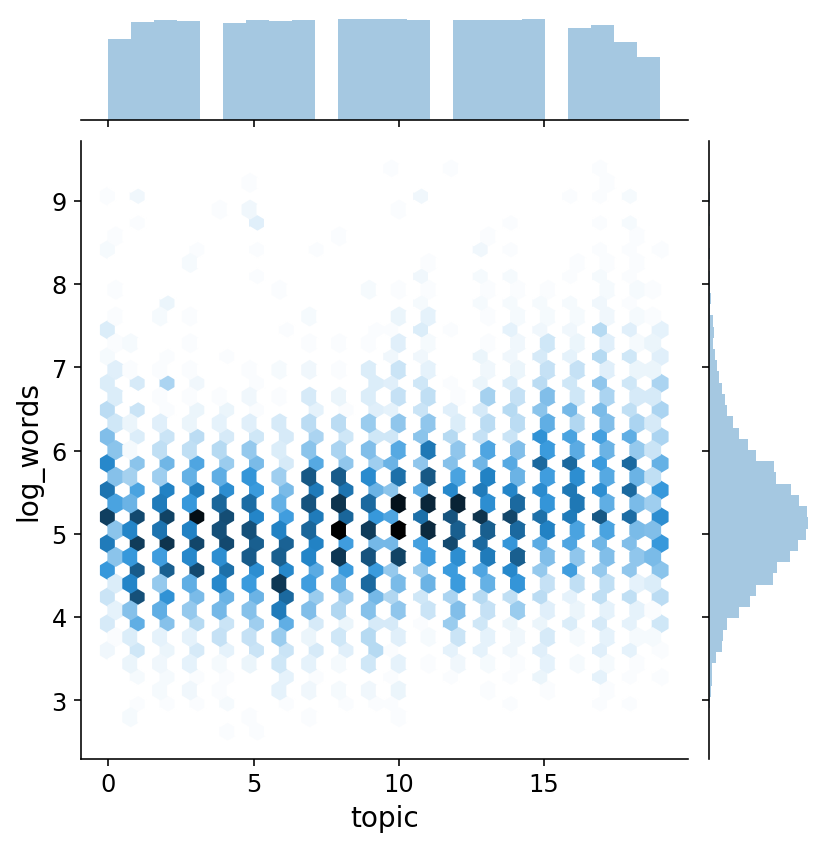

In [17]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='topic', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [18]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 1357),
 ('of', 645),
 ('to', 578),
 ('and', 548),
 ('a', 532),
 ('in', 427),
 ('i', 370),
 ('is', 360),
 ('that', 300),
 ('for', 250),
 ('it', 193),
 ('on', 189),
 ('you', 173),
 ('have', 161),
 ('be', 158),
 ('-', 156),
 ('with', 156),
 ('this', 148),
 ('are', 142),
 ('>', 140)]

# Dictionary / Matching Methods

## Sentiment Analysis

In [19]:
# Dictionary-Based Sentiment Analysis
#nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
polarity = sid.polarity_scores(doc)
print(polarity)

{'neg': 0.012, 'neu': 0.916, 'pos': 0.072, 'compound': 0.807}


In [20]:
# sample 20% of the dataset
dfs = df.sample(frac=.2) 

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment'] = dfs['text'].apply(get_sentiment)

In [21]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['text']]

['\nSubject: CLINTON: AM Press Briefing by Dee Dee Myers -- 4.15.93\nOrganization: Project GNU, Free Sof',
 '10 Medical Newsletter, Part 2/4\nReply-To: david@stat.com (David Dodell)\nDistribution: world\nOrganiza',
 "\nSubject: CLINTON: President's Remarks at Town Hall Meeting\nOrganization: MIT Artificial Intelligenc",
 '\nSubject: Final Public Dragon Magazine Update (Last chance for public bids)\nKeywords: Dragon Magazin',
 '\nSubject: CLINTON: Background BRiefing in Vancouver 4.4.93\nOrganization: Project GNU, Free Software ']

In [22]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['text']]

['OSE OF FALKLANDS WAR\nOrganization: University of Wisconsin Eau Claire\nLines: 918\n\n\n\nSECRET PURPOSE O',
 'ct: Re: Need info on 43:1 and suicide for refutation\nOrganization: Ideology Busters, Inc.\nDistributi',
 ' e)\nSubject: Re: Sinus vs. Migraine (was Re: Sinus Endoscopy)\nOrganization: Bellcore, Livingston, NJ',
 'ews in LATVIA - some documents\nArticle-I.D.: zuma.9304052018\nReply-To: sera@zuma.UUCP (Serdar Argic)',
 'year the Turkish Nation is mourning and praying again for...\nReply-To: sera@zuma.UUCP (Serdar Argic)']

## StopWords

In [23]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

10499

In [25]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

18302

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [26]:
import re

docs = dfs[:5]['text']

# Extract words after Subject.
for doc in docs:    
    print(re.findall(r'Subject: \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Subject: SECRET ']
['Subject: Gun ']
[]
[]
['Subject: This ']


In [27]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['IN-VISIBILITY', 'wind-swept', 'so-called', 'longer-range', 'so-called', 'two-thirds', 'semi-permanent', 'far-off', 'so-called', 'fast-approaching', 'so-called', 'up-to', 'anti-Bolshevik', 'long-range', 'two-prong', 'Rockefeller-controlled', 'full-fledged', 'all-out', 'so-called', 'then-President', 'over-all', 'so-called', 'particle-beam', 'man-made', 'then-Secretary', 'newly-launched', 'nuclear-powered', 'so-called', 'war-planes', 'Stealth-field', 'three-phase', 'war-room', 'all-out', 'anti-Bolshevik', 'anti-Bolshevik', 'so-called', 'slow-down', 'anti-Bolshevik', 'Rockefeller-Russian', 'mid-February', 'Bolshevik-controlled', 'long-standing', 'scrap-metal', 'work-site', 'year-old', 'long-standing', 'far-off', 'Rockefeller-Russian', 'high-speed', 'Rockefeller-Russian', 'Rockefeller-Russian', 'so-called', 'blast-proof', 'Rockefeller-Russian', 'mid-Atlantic', 'Rockefeller-Russian', 'hollowed-out', 'beam-weapon', 'Range-Finding', 'non-homing', 'non-nuclear', 'pseudo-smile', 'Rockefeller-R

In [28]:
# extract email addresses
for i, doc in enumerate(docs):
    finder = re.finditer('\w+@.+\.\w\w\w', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (6, 29) mcelwre@cnsvax.uwec.edu
0 (274, 291) eidetics@cerf.net
1 (6, 27) lvc@cbnews.cb.att.com
1 (11768, 11784) cipriani@att.com
2 (6, 33) jer@prefect.cc.bellcore.com
3 (6, 19) sera@zuma.UUC
3 (121, 134) sera@zuma.UUC
3 (202, 249) 50D@unix.amherst.edu> nwbernst@unix.amherst.edu
4 (6, 19) sera@zuma.UUC
4 (121, 134) sera@zuma.UUC


In [29]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [30]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [31]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [32]:
df['uncertainty'] = df['text'].apply(indicates_uncertainty)

In [33]:
df.uncertainty.mean()

0.00017677214071062401

In [34]:
df[df.uncertainty]

,text,topic,num_words,log_words,uncertainty
2350,From: ld231782@longs.lance.colostate.edu (L. D...,11,8569,9.055906,True
4682,From: ld231782@longs.lance.colostate.edu (L. D...,11,8520,9.050172,True


# Featurizing Texts

In [35]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

**Sentence Tokenization**

**NLTK has a fast implementation that makes errors.**

In [36]:
from nltk import sent_tokenize
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

['Prof. Zurich hailed from Zurich.', 'She got 3 M.A.', "'s from ETH."]


**spacy works better.**

**Install spacy and the English model if you have not already.**

In [37]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [38]:
# 
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


**Removing capitalization.**

In [39]:
# Capitalization
text_lower = text.lower() # go to lower-case
text_lower

"prof. zurich hailed from zurich. she got 3 m.a.'s from eth."

In [40]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation
punc_remover = str.maketrans('','',punctuation) 
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

prof zurich hailed from zurich she got 3 mas from eth


In [41]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [42]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#' 
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'mas', 'from', 'eth']
['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '#', 'mas', 'from', 'eth']


In [43]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['prof', 'zurich', 'hailed', 'zurich', 'got', '#', 'mas', 'eth']


In [89]:
# scikit-learn stopwords
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [45]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:10]

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across']

In [46]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in ['tax','taxes','taxed','taxation']]
print(tokens_stemmed)

['tax', 'tax', 'tax', 'taxat']


In [47]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [49]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wnl = WordNetLemmatizer()
[wnl.lemmatize(c) for c in ['corporation', 'corporations', 'corporate']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gehwo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


['corporation', 'corporation', 'corporate']

Let's wrap it into a recipe.

In [50]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the corpus.

In [51]:
df['tokens_cleaned'] = df['text'].apply(normalize_text)
df['tokens_cleaned']

0        [lerxstwamumdedu, where, thing, subject, car, ...
1        [guykuocarsonuwashingtonedu, guy, kuo, subject...
2        [twillisececnpurdueedu, thoma, e, willi, subje...
3        [jgreenamb, joe, green, subject, weitek, p9000...
4        [jcmheadcfaharvardedu, jonathan, mcdowel, subj...
                               ...                        
11309    [jimzisfeinfactorycom, jim, zisfein, subject, ...
11310    [ebodinpearltuftsedu, subject, screen, death, ...
11311    [westesnetcomcom, est, subject, mount, cpu, co...
11312    [stevehcrlgw, steven, collin, subject, sphere,...
11313    [gunningccocaltechedu, kevin, j, gun, subject,...
Name: tokens_cleaned, Length: 11314, dtype: object

**Shortcut: `gensim.simple_preprocess`.**

In [52]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [53]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


Now let's `simple_preprocess` on the corpus.

In [54]:
df['tokens_simple'] = df['text'].apply(simple_preprocess)
df['tokens_simple']

0        [from, lerxst, wam, umd, edu, where, my, thing...
1        [from, guykuo, carson, washington, edu, guy, k...
2        [from, twillis, ec, ecn, purdue, edu, thomas, ...
3        [from, jgreen, amber, joe, green, subject, re,...
4        [from, jcm, head, cfa, harvard, edu, jonathan,...
                               ...                        
11309    [from, jim, zisfein, factory, com, jim, zisfei...
11310    [from, ebodin, pearl, tufts, edu, subject, scr...
11311    [from, westes, netcom, com, will, estes, subje...
11312    [from, steve, hcrlgw, steven, collins, subject...
11313    [from, gunning, cco, caltech, edu, kevin, gunn...
Name: tokens_simple, Length: 11314, dtype: object

## Tagging Parts of Speech

In [55]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

#nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

Plot nouns and adjectives by topic

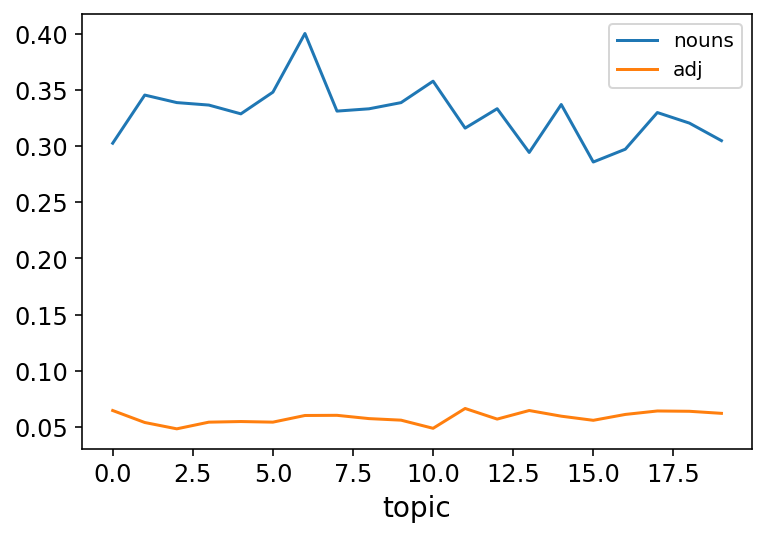

In [56]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N']) / len(tags)
    num_adj = len([t for t in tags if t[0] == 'J']) / len(tags)
    return num_nouns, num_adj

dfs['nouns'], dfs['adj'] = zip(*dfs['text'].map(get_nouns_adj))
dfs.groupby('topic')[['nouns','adj']].mean().plot()

# Corpus Prep with spaCy

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [57]:
dfs = df.sample(10)
dfs['doc'] = dfs['text'].apply(nlp)

In [58]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[10]
sent1 # sentence

I'd bet

In [59]:
# tokens
list(sent1) 

[I, 'd, bet, ]

In [60]:
# lemmas
[x.lemma_ for x in sent1]

['-PRON-', 'would', 'bet', '\n']

In [61]:
# POS tags
[x.tag_ for x in sent1]

['PRP', 'MD', 'VB', '_SP']

# N-grams

In [62]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 41),
 (('subject:', 're:'), 37),
 (('in', 'the'), 33),
 (('to', 'the'), 27),
 (('i', 'am'), 21),
 (('i', 'have'), 21),
 (('to', 'be'), 19),
 (('on', 'the'), 18)]

In [63]:
# spacy NER noun chunks
i = 0
chunks = list(nlp(df['text'].iloc[10]).noun_chunks)
chunks

[irwin@cmptrc.lonestar.org (Irwin Arnstein,
 Subject,
 Recommendation,
 Duc,
 Summary,
 What,
 it,
 Distribution,
 usa,
 Sat, 1 May 1993 05:00:00 GMT
 Organization,
 CompuTrac Inc.,
 Keywords,
 Ducati,
 GTS,
 Lines,
 I,
 a line,
 a Ducati 900GTS 1978 model,
 17k,
 the clock,
 Runs,
 paint,
 the bronze/brown/orange,
 a bit,
 oil,
 pops,
 1st,
 hard accel,
 The shop,
 trans and oil 
 leak,
 They,
 the bike,
 the 1 and only owner,
 They,
 I,
 Any opinions,
 me,
 Thanks,
 It,
 a nice stable mate,
 the Beemer,
 I,
 a jap bike,
 myself,
 "Tuba,
 Irwin,
 I,
 I,
 CompuTrac-Richardson,
 Tx,
 DoD #0826          (R75/6]

# Tokenizers

In [64]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 13),
 ('sabbath', 6),
 ('to', 6),
 ('is', 6),
 ('that', 5),
 ('i', 4),
 ('one', 4),
 ('of', 4),
 ('have', 3),
 ('this', 3),
 ('on', 3),
 ('not', 3),
 ('been', 2),
 ('and', 2),
 ('with', 2),
 ('at', 2),
 ('argument', 2),
 ('those', 2),
 ('since', 2),
 ('a', 2)]

Usually we use scikit-learn's vectorizer.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.001, # at min 0.1% of docs
                        max_df=.8,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(df['text'])

# save the vectors
# pd.to_pickle(X,'X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
#pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [66]:
X

<11314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 526707 stored elements in Compressed Sparse Row format>

In [67]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [68]:
df['text']

0        From: lerxst@wam.umd.edu (where's my thing)\nS...
1        From: guykuo@carson.u.washington.edu (Guy Kuo)...
2        From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3        From: jgreen@amber (Joe Green)\nSubject: Re: W...
4        From: jcm@head-cfa.harvard.edu (Jonathan McDow...
                               ...                        
11309    From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310    From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311    From: westes@netcom.com (Will Estes)\nSubject:...
11312    From: steve@hcrlgw (Steven Collins)\nSubject: ...
11313    From: gunning@cco.caltech.edu (Kevin J. Gunnin...
Name: text, Length: 11314, dtype: object

In [90]:
X_tfidf[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [70]:
type(X_tfidf)

scipy.sparse.csr.csr_matrix

Make word cloud of common words by topic id.

In [71]:
df['topic'].value_counts() 

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: topic, dtype: int64

In [72]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['00', '000', '01', '02', '03', '04', '0d', '0t', '10', '100'],
 ['writes article',
  'written',
  'wrong',
  'wrote',
  'year',
  'years',
  'years ago',
  'yes',
  'york',
  'young'])

1


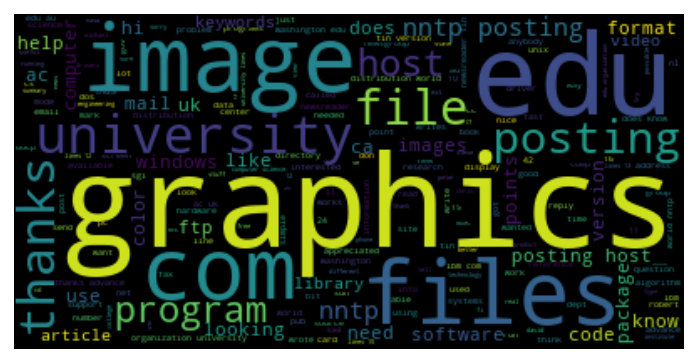

2


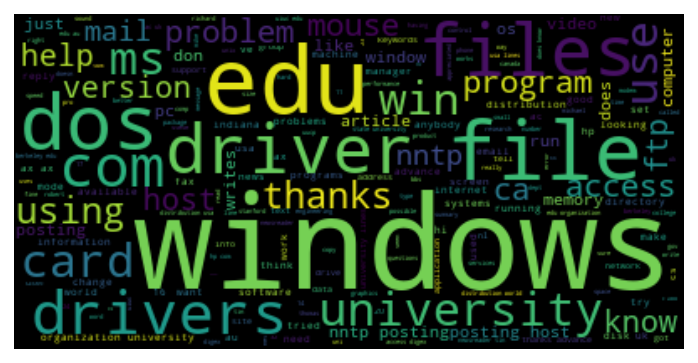

8


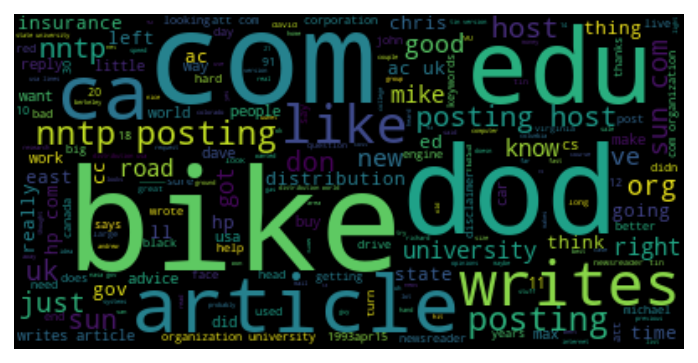

9


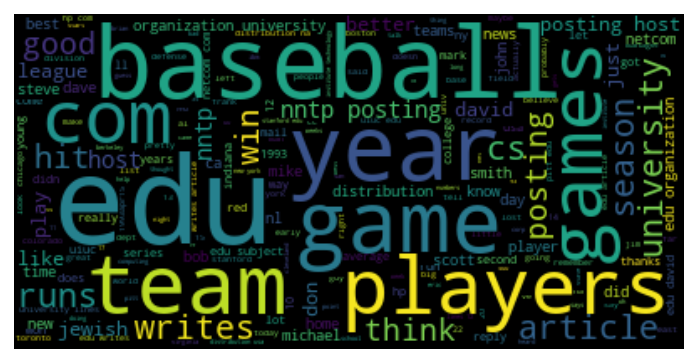

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

In [81]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10)
X_hash = hv.fit_transform(df['text'])
X_hash

<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

# Feature Selection

In [82]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['topic']==1
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['friend',
 'pub',
 'file',
 'cmu edu',
 'form',
 'image',
 'away',
 'avoid',
 'ii',
 'government']

In [83]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [84]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [85]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['algorithm',
 'info',
 'use',
 'digex',
 'file',
 'close',
 'image',
 'figure',
 'ii',
 'government']

# Document Distance

In [86]:
# compute pair-wise similarities between all documents in corpus"
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X[:100])
sim.shape

(100, 100)

In [87]:
sim[:4,:4]

array([[1.        , 0.20384233, 0.15095711, 0.19219753],
       [0.20384233, 1.        , 0.12569587, 0.1608558 ],
       [0.15095711, 0.12569587, 1.        , 0.16531366],
       [0.19219753, 0.1608558 , 0.16531366, 1.        ]])

In [88]:
# TF-IDF Similarity
tsim = cosine_similarity(X_tfidf[:100])
tsim[:4,:4]

array([[1.        , 0.05129256, 0.08901433, 0.06064389],
       [0.05129256, 1.        , 0.07497709, 0.03570566],
       [0.08901433, 0.07497709, 1.        , 0.09077347],
       [0.06064389, 0.03570566, 0.09077347, 1.        ]])